## About

## Libraries

First, we need to install the following libraries:

- [matplotlib](https://python-graph-gallery.com/matplotlib/): for plot customization
- [seaborn](https://python-graph-gallery.com/seaborn/): for creating the plot
- [pandas](https://python-graph-gallery.com/pandas/): for data manipulation
- [highlight_text](https://python-graph-gallery.com/advanced-custom-annotations-matplotlib/): for annotations

In [14]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
import matplotlib.colors as mcolors
import seaborn as sns
import pandas as pd
from highlight_text import ax_text

## Dataset

The type of data needed when creating a [heatmap](https://python-graph-gallery.com/heatmap/) is a **matrix**. Each individual cell in the matrix **represents a value** that will be visualized using a color scale.

In this post we need 2 datasets:

- **original** heatmap
- **normalized** heatmap

In [10]:
path = '../../static/data/heatmap_data.csv'
heatmap_data = pd.read_csv(path, index_col=0)

path = '../../static/data/heatmap_data_norm.csv'
heatmap_data_norm = pd.read_csv(path, index_col=0)

## Simple double heatmap

We start by creating a **figure with 2 subplots**.

The first subplot will contain the **original heatmap**, and the second subplot will contain the **normalized heatmap**.

We use the `heatmap()` function from [seaborn](https://python-graph-gallery.com/seaborn/) to create the heatmaps.

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(16, 10))

# iterate over the datasets
for i, data in enumerate([heatmap_data, heatmap_data_norm]):
    
    # plot the heatmap
    sns.heatmap(
        data,
        ax=axs[i],
        cbar=False
    )

# save and show
plt.savefig('../../static/graph/web-heatmap-comparison-1.png', bbox_inches='tight')
plt.show()

![preview](https://github.com/holtzy/The-Python-Graph-Gallery/blob/master/static/graph/web-circular-barplot-with-matplotlib-square.png?raw=true)

## Custom color map and remove axis

The next step is to customize the **color map** and **remove** the axis.

- the **colormap** is created using the `LinearSegmentedColormap.from_list()` function, and then we pass it as an argument to the `cmap` parameter of the `heatmap()` function

- the **axis** is removed using the `set_axis_off()` function

In [ ]:
# create a custom colormap
cmap = mcolors.LinearSegmentedColormap.from_list("", ["#2a9d8f", "#e9c46a", "#e76f51"])

fig, axs = plt.subplots(ncols=2, figsize=(16, 10))

# iterate over the datasets
for i, data in enumerate([heatmap_data, heatmap_data_norm]):
    
    # plot the heatmap
    sns.heatmap(
        data,
        ax=axs[i],
        cmap=cmap,
        cbar=False
    )

    # remove the axis
    axs[i].set_axis_off()

# save and show
plt.savefig('../../static/graph/web-heatmap-comparison-2.png', bbox_inches='tight')
plt.show()

![preview](https://github.com/holtzy/The-Python-Graph-Gallery/blob/master/static/graph/web-circular-barplot-with-matplotlib-square.png?raw=true)

## Add region labels

The next step is to add **region labels** to the heatmaps.

For this, we **iterate over the index** of the dataset (where the region names are stored) and add the text to the plot using the `text()` function. We have to specify:

- the **x** and **y** coordinates
- the **text** to display
- the **horizontal alignment**
- the **vertical alignment**
- the **font size**
- the **font weight**

*Warning*: make sure **both** of the heatmaps have the **same region names in the same order**, otherwise the labels will not match the regions.

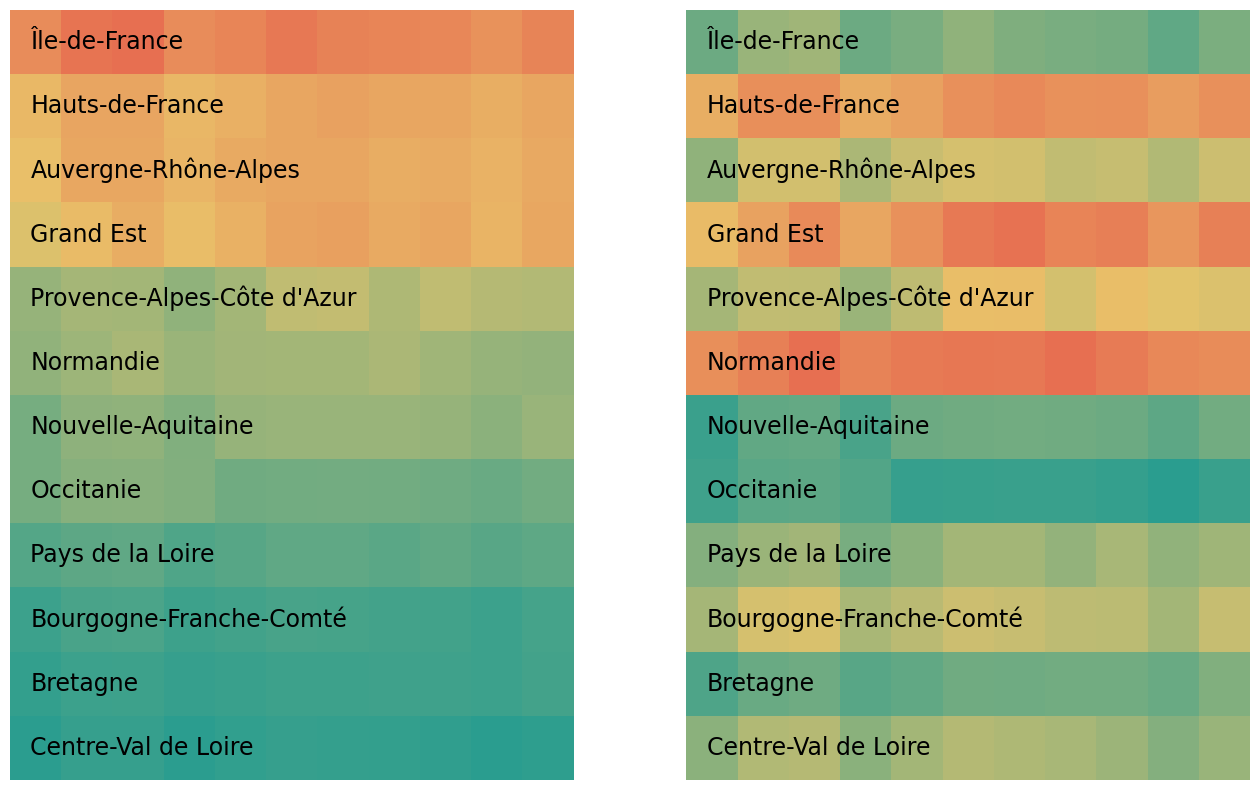

In [21]:
# create a custom colormap
cmap = mcolors.LinearSegmentedColormap.from_list("", ["#2a9d8f", "#e9c46a", "#e76f51"])

fig, axs = plt.subplots(ncols=2, figsize=(16, 10))

# iterate over the datasets
for i, data in enumerate([heatmap_data, heatmap_data_norm]):
    
    # plot the heatmap
    sns.heatmap(
        data,
        ax=axs[i],
        cmap=cmap,
        cbar=False
    )

    # remove the axis
    axs[i].set_axis_off()

    # add the region names
    for j,region in enumerate(data.index):
        axs[i].text(
            0.4, # x axis position
            j+0.5, # y axis position
            f"{region}", # text
            ha='left',
            va='center',
            fontsize=17,
            fontweight='light',
        )

# save and show
plt.savefig('../../static/graph/web-heatmap-comparison-3.png', bbox_inches='tight')
plt.show()

![preview](https://github.com/holtzy/The-Python-Graph-Gallery/blob/master/static/graph/web-circular-barplot-with-matplotlib-square.png?raw=true)

## Add legend

Now let's add a **legend** to the heatmaps so that it's more understandable.

We add both `Consommation d'énergie` and `Consommation d'énergie par habitant` to the legend using the `text()` function.

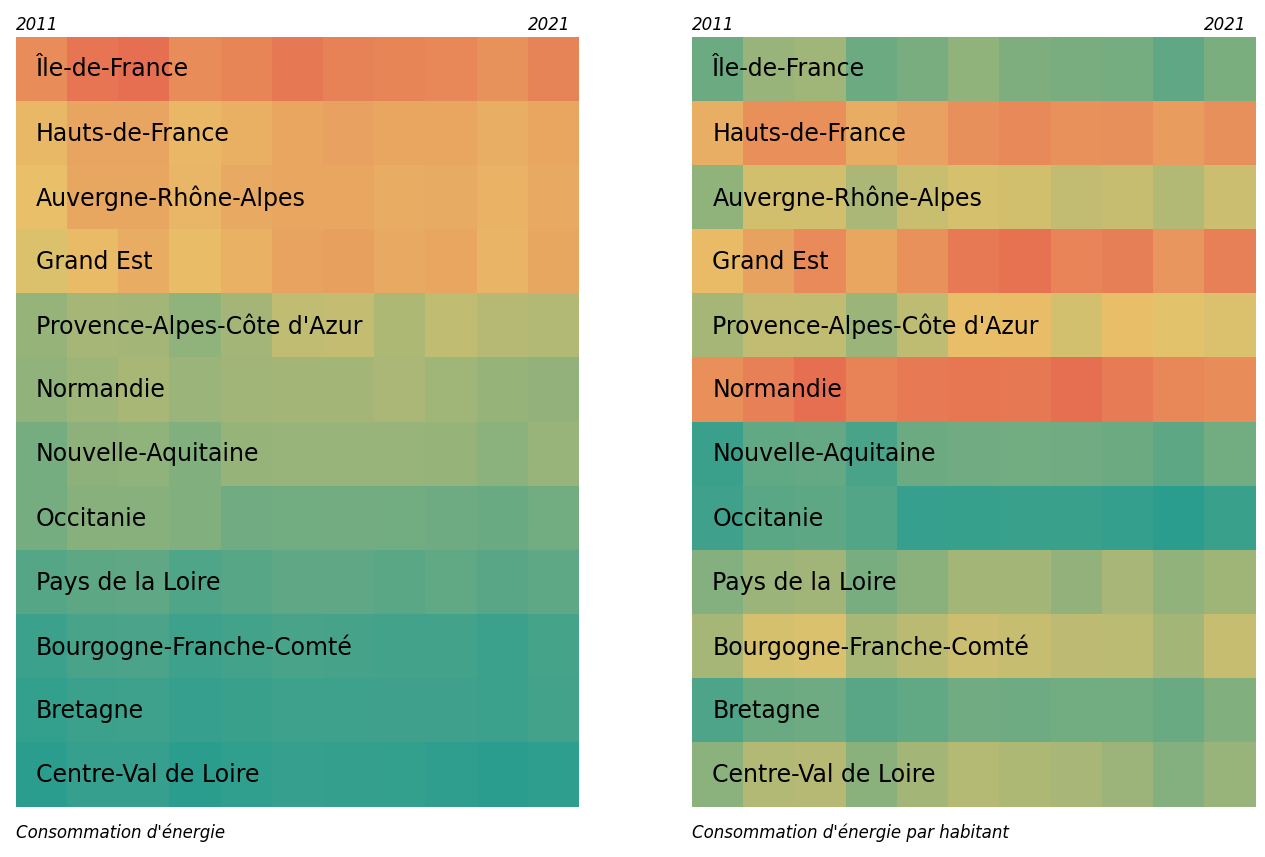

In [23]:
# create a custom colormap
cmap = mcolors.LinearSegmentedColormap.from_list("", ["#2a9d8f", "#e9c46a", "#e76f51"])

fig, axs = plt.subplots(ncols=2, figsize=(16, 10))

# iterate over the datasets
for i, data in enumerate([heatmap_data, heatmap_data_norm]):
    
    # plot the heatmap
    sns.heatmap(
        data,
        ax=axs[i],
        cmap=cmap,
        cbar=False
    )

    # remove the axis
    axs[i].set_axis_off()

    # add the region names
    for j,region in enumerate(data.index):
        axs[i].text(
            0.4, # x axis position
            j+0.5, # y axis position
            f"{region}", # text
            ha='left',
            va='center',
            fontsize=17,
            fontweight='light',
        )

    # description of each heatmap
    if i==0: # first heatmap
        text = "Consommation d'énergie"
    else: # second heatmap
        text = "Consommation d'énergie par habitant"
    ax_text(
        0, 12.4,
        f"<{text}>",
        ha='left', va='center',
        fontsize=12, fontweight='light',
        color='black',
        highlight_textprops=[
            {"style": "italic"}
        ],
        ax=axs[i]
    )

    # date for reference
    ax_text(
        0, -0.2,
        "<2011>",
        ha='left', va='center',
        fontsize=12, fontweight='light',
        color='black',
        highlight_textprops=[
            {"style": "italic"}
        ],
        ax=axs[i]
    )
    ax_text(
        10, -0.2,
        "<2021>",
        ha='left', va='center',
        fontsize=12, fontweight='light',
        color='black',
        highlight_textprops=[
            {"style": "italic"}
        ],
        ax=axs[i]
    )

# save and show
plt.savefig('../../static/graph/web-heatmap-comparison-4.png', bbox_inches='tight')
plt.show()

![preview](https://github.com/holtzy/The-Python-Graph-Gallery/blob/master/static/graph/web-circular-barplot-with-matplotlib-square.png?raw=true)

We have the main components of the plot! It only misses a title and a bunch of annotations.

## Final chart with annotations

All annotations relies on the `ax_text()` function from the `highlight_text` library. In this [post](https://python-graph-gallery.com/advanced-custom-annotations-matplotlib/) we explain **how to use it** in detail.

The arrows are created using the `FancyArrowPatch()` function from `matplotlib.patches`. You can **learn more** about them in this [post](https://python-graph-gallery.com/how-to-create-and-custom-arrows-matplotlib/).

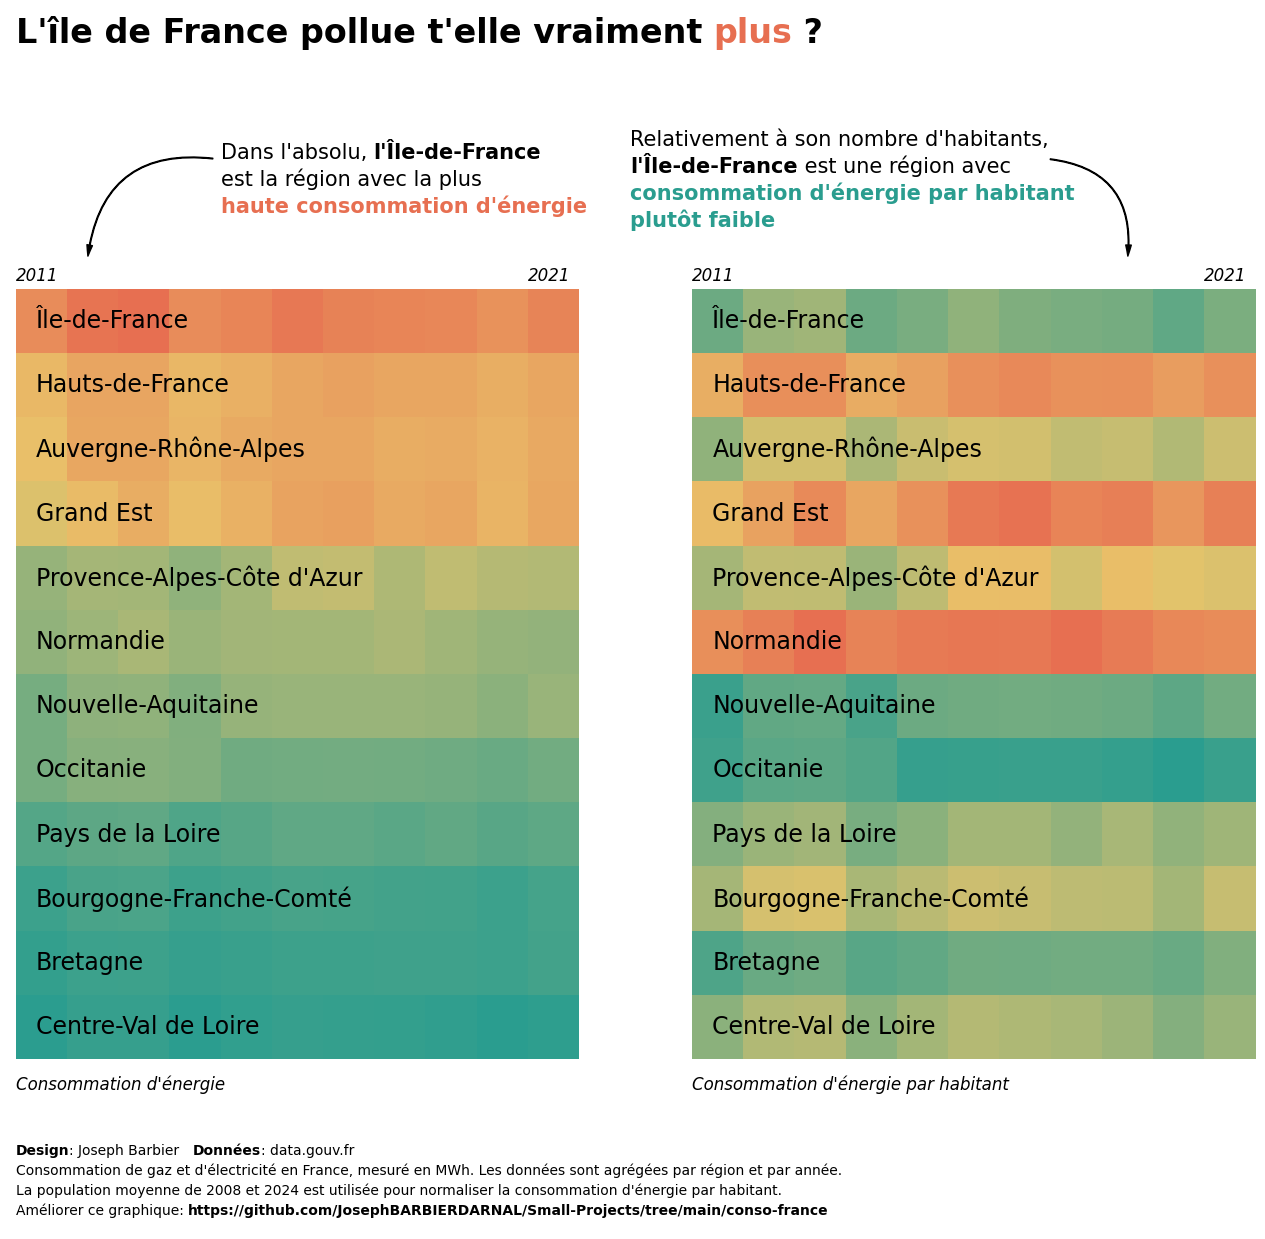

In [31]:
# create a custom colormap
cmap = mcolors.LinearSegmentedColormap.from_list("", ["#2a9d8f", "#e9c46a", "#e76f51"])

fig, axs = plt.subplots(ncols=2, figsize=(16, 10))

# iterate over the datasets
for i, data in enumerate([heatmap_data, heatmap_data_norm]):
    
    # plot the heatmap
    sns.heatmap(
        data,
        ax=axs[i],
        cmap=cmap,
        cbar=False
    )

    # remove the axis
    axs[i].set_axis_off()

    # add the region names
    for j,region in enumerate(data.index):
        axs[i].text(
            0.4, # x axis position
            j+0.5, # y axis position
            f"{region}", # text
            ha='left',
            va='center',
            fontsize=17,
            fontweight='light',
        )

    # description of each heatmap
    if i==0: # first heatmap
        text = "Consommation d'énergie"
    else: # second heatmap
        text = "Consommation d'énergie par habitant"
    ax_text(
        0, 12.4,
        f"<{text}>",
        ha='left', va='center',
        fontsize=12, fontweight='light',
        color='black',
        highlight_textprops=[
            {"style": "italic"}
        ],
        ax=axs[i]
    )

    # date for reference
    ax_text(
        0, -0.2,
        "<2011>",
        ha='left', va='center',
        fontsize=12, fontweight='light',
        color='black',
        highlight_textprops=[
            {"style": "italic"}
        ],
        ax=axs[i]
    )
    ax_text(
        10, -0.2,
        "<2021>",
        ha='left', va='center',
        fontsize=12, fontweight='light',
        color='black',
        highlight_textprops=[
            {"style": "italic"}
        ],
        ax=axs[i]
    )

# title
text = "L'île de France pollue t'elle vraiment <plus> ?"
ax_text(
    0, -4,
    text,
    ha='left', va='center',
    fontsize=24, fontweight='bold',
    color='black',
    highlight_textprops=[
        {"color": "#e76f51"}
    ],
    ax=axs[0]
)

# credit source
text = """
<Design>: Joseph Barbier   <Données>: data.gouv.fr
Consommation de gaz et d'électricité en France, mesuré en MWh. Les données sont agrégées par région et par année.
La population moyenne de 2008 et 2024 est utilisée pour normaliser la consommation d'énergie par habitant.
Améliorer ce graphique: <https://github.com/JosephBARBIERDARNAL/Small-Projects/tree/main/conso-france>
"""
ax_text(
    0, 13.9,
    text,
    ha='left', va='center',
    fontsize=10, fontweight='light',
    color='black',
    highlight_textprops=[
        {"fontweight": "bold"},
        {"fontweight": "bold"},
        {"fontweight": "bold"}
    ],
    ax=axs[0]
)

# left explanation
text = "Dans l'absolu, <l'Île-de-France>\nest la région avec la plus\n<haute consommation d'énergie>"
ax_text(
    4, -1.7,
    text,
    ha='left', va='center',
    fontsize=15, fontweight='light',
    color='black',
    highlight_textprops=[
        {"fontweight": "bold"},
        {"color": "#e76f51", "fontweight": "bold"}
    ],
    ax=axs[0]
)

# right explanation
text = "Relativement à son nombre d'habitants,\n<l'Île-de-France> est une région avec\n<consommation d'énergie par habitant>\n<plutôt faible>"
ax_text(
    12, -1.7,
    text,
    ha='left', va='center',
    fontsize=15, fontweight='light',
    color='black',
    highlight_textprops=[
        {"fontweight": "bold"},
        {"color": "#2a9d8f", "fontweight": "bold"},
        {"color": "#2a9d8f", "fontweight": "bold"}
    ],
    ax=axs[0]
)

# arrows
def draw_arrow(tail_position, head_position, invert=False):
    kw = dict(arrowstyle="Simple, tail_width=0.5, head_width=4, head_length=8", color="k")
    if invert:
        connectionstyle = "arc3,rad=-.5"
    else:
        connectionstyle = "arc3,rad=.5"
    a = FancyArrowPatch(tail_position, head_position,
                                connectionstyle=connectionstyle,
                                transform=fig.transFigure,
                                **kw)
    fig.patches.append(a)

draw_arrow((0.25, 1.01), (0.17, 0.91))
draw_arrow((0.77, 1.01), (0.82, 0.91), invert=True)

# save and show
plt.savefig('../../static/graph/web-heatmap-comparison-5.png', bbox_inches='tight')
plt.show()

![preview](https://github.com/holtzy/The-Python-Graph-Gallery/blob/master/static/graph/web-circular-barplot-with-matplotlib-square.png?raw=true)

## Going further

This post shows how to create a **double heatmap** with **annotations** using [matplotlib](https://python-graph-gallery.com/matplotlib/) and [seaborn](https://python-graph-gallery.com/seaborn/).

For more examples of **advanced customization**, check out [how to create a beautiful legend](https://python-graph-gallery.com/web-ridgeline-by-text/) and this [really nice heatmap for time series](https://python-graph-gallery.com/heatmap-for-timeseries-matplotlib/).